In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Receiver Operating Characteristic (ROC)

This notebook illustrates making of ROC for several classification models. More information on ROC is available at: https://pubs.rsna.org/doi/abs/10.1148/radiology.143.1.7063747

## Prepare the data

In this example we use Breast Cancer data (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), which is a part of Scikit-learn.

In [3]:
d = load_breast_cancer()
X, y = d['data'], d['target']
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
X_train.shape, X_test.shape

((426, 30), (143, 30))

## Fit Classification Models

We use a few classification models. Change their parameters/add/remove models as needed.

In [4]:
models = [(LogisticRegression(),'Logistic regression')
          , (DecisionTreeClassifier(random_state = 1, max_depth = 3), 'Decision tree, depth = 3')
          #, (DecisionTreeClassifier(random_state = 1, max_depth = 8), 'Decision tree, depth = 8')
          #, (MLPClassifier(hidden_layer_sizes = (10,),random_state = 1), 'Neural network (10,)')
          , (MLPClassifier(hidden_layer_sizes = (100, 100,),random_state = 1), 'Neural network (100, 100)')
          , (KNeighborsClassifier(n_neighbors = 2), 'KNN, k = 2')
         ]

The function below computes False Positive (FPR) and True Positive Ratios (TPR) for each model on the data. In addition, the function computes and returns the area under curve (AUC) that characterizes model performance. The ratios are used to visualize the ROC:

In [6]:
def get_fpr_tpr(model, X_train, y_train, X_test, y_test):
    m = model[0]
    m.fit(X_train, y_train)
    y_pred_proba = m.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label = 1)
    auc = roc_auc_score(y_test, y_pred_proba)
    return dict({'model':model[1],'fpr':fpr, 'tpr':tpr, 'auc':auc})

roc_data = [get_fpr_tpr(m, X_train, y_train, X_test, y_test) for m in models]
#roc_data

## Visualize ROC

Finally the ROC curves are visualized to compare the models:

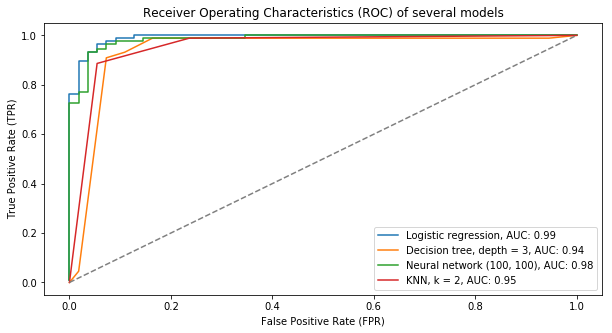

In [8]:
plt.figure(figsize = (10,5))
for roc in roc_data:
    plt.plot(roc['fpr'],roc['tpr'],label="%s, AUC: %.2f"%(roc['model'],roc['auc']))
plt.plot((0,1),(0,1),linestyle='--',color='gray')
plt.legend()
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristics (ROC) of several models')
plt.show()